# Sum of two sines and moving average
Here I will study how the statistics and the signal between a sine and its moving average.

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [172]:
w1 = 0.3
w2 = 1.0
dt = 0.1
T = 200
Nt = int(T / dt)
Tperiod1 = 20.0
w1 = (2 * np.pi) / Tperiod1
Tperiod2 = 2.0
A2 = 10.0
w2 = (2 * np.pi) / Tperiod2
A = 5.0


t = np.arange(start=0, stop=T, step=dt)
original_signal = np.sin(w1 * t) + A2 * np.sin(w2 * t) 
original_signal = A * np.sin(w1 * t) * np.sin(w2 * t)


# Get some noise
noise = False
if noise:
    std = 1.0
    noise = np.random.normal(loc=0, scale=std, size=t.size)
    original_signal += original_signal

# Now let's calculate a moving average
window_size = 5.0
Nwindow_size = int(window_size / dt)
a = np.ones(Nwindow_size)


#### Create the moving average

In [173]:
y1 = np.zeros(Nt)
y2 = np.zeros(Nt)
aux = np.convolve(original_signal, a / Nwindow_size, mode='valid')
y2[Nwindow_size:] = aux[:-1]

for index in range(Nwindow_size, Nt):
    x_windowed = original_signal[index - Nwindow_size:index]
    product = np.dot(x_windowed, a) / Nwindow_size
    y1[index] = product
                   

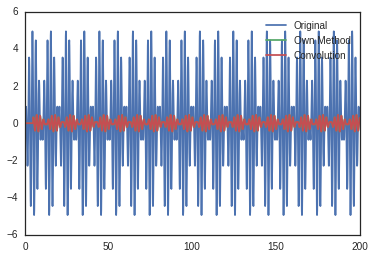

In [174]:
plt.plot(t, original_signal, label='Original')
plt.plot(t, y1, label='Own Method')
plt.plot(t, y2, label='Convolution')
# plt.ylim([-3, 3])
plt.legend()

#### Now print the correlations

In [175]:
print(np.corrcoef(original_signal, y1))
print(np.corrcoef(original_signal, y2))

[[ 1.         -0.04154273]
 [-0.04154273  1.        ]]
[[ 1.         -0.04154273]
 [-0.04154273  1.        ]]


#### Autocorrelations of the Signal

In [176]:
nlags = 200
t = np.arange(0, int((nlags) * dt) + dt, dt)
# t = np.linspace(0, int(nlags * dt), num=nlags)
acf_original = sm.tsa.stattools.acf(original_signal, nlags=nlags)
acf_y1 = sm.tsa.stattools.acf(y1, nlags=nlags)
acf_y2 = sm.tsa.stattools.acf(y2, nlags=nlags)

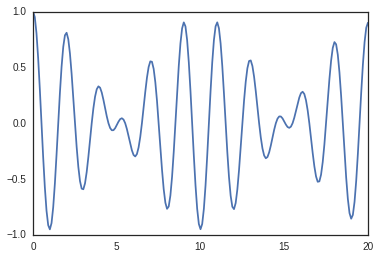

In [177]:
plt.plot(t, acf_original)

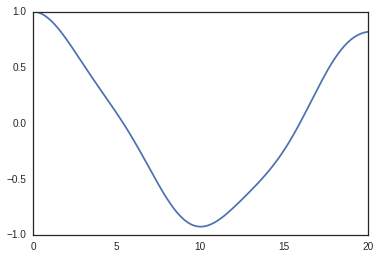

In [145]:
plt.plot(t, acf_y1)

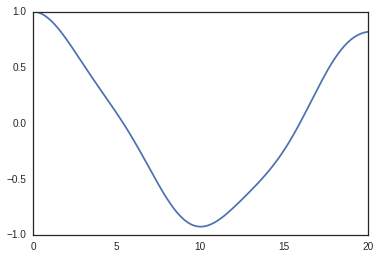

In [146]:
plt.plot(t, acf_y2)

## Now we Process our data with Nexa

In [150]:
import sys
sys.path.append("../")

from inputs.sensors import Sensor, PerceptualSpace
from inputs.lag_structure import LagStructure

# Visualization libraries
from visualization.sensor_clustering import visualize_cluster_matrix
from visualization.sensors import visualize_SLM
from visualization.sensors import visualize_STDM_seaborn
from visualization.time_cluster import visualize_time_cluster_matrix
from visualization.code_vectors import visualize_code_vectors

from nexa.nexa import Nexa

In [156]:
Tperiod = Tperiod1
lag_times = np.arange(0, 2 * Tperiod) # Go two times the period
tau = 2 * Tperiod
window_size = 1 * Tperiod
Nwindowsize = int(window_size / dt)
# weights = np.exp( -np.arange(Nwindowsize) / tau) 
weights = None
lag_structure = LagStructure(lag_times=lag_times, weights=weights, window_size=window_size)
sensor1 = Sensor(original_signal, dt, lag_structure)
sensor2 = Sensor(y1, dt, lag_structure)
sensors = [sensor1, sensor2]
perceptual_space = PerceptualSpace(sensors, lag_first=True)

Nspatial_clusters = 4  # Number of spatial clusters
Ntime_clusters = 2  # Number of time clusters
Nembedding = 3  # Dimension of the embedding space

# Now the Nexa object
nexa_object = Nexa(perceptual_space, Nspatial_clusters,
                   Ntime_clusters, Nembedding)

# Make all the calculations
nexa_object.calculate_all()

### Nexa Visualizations

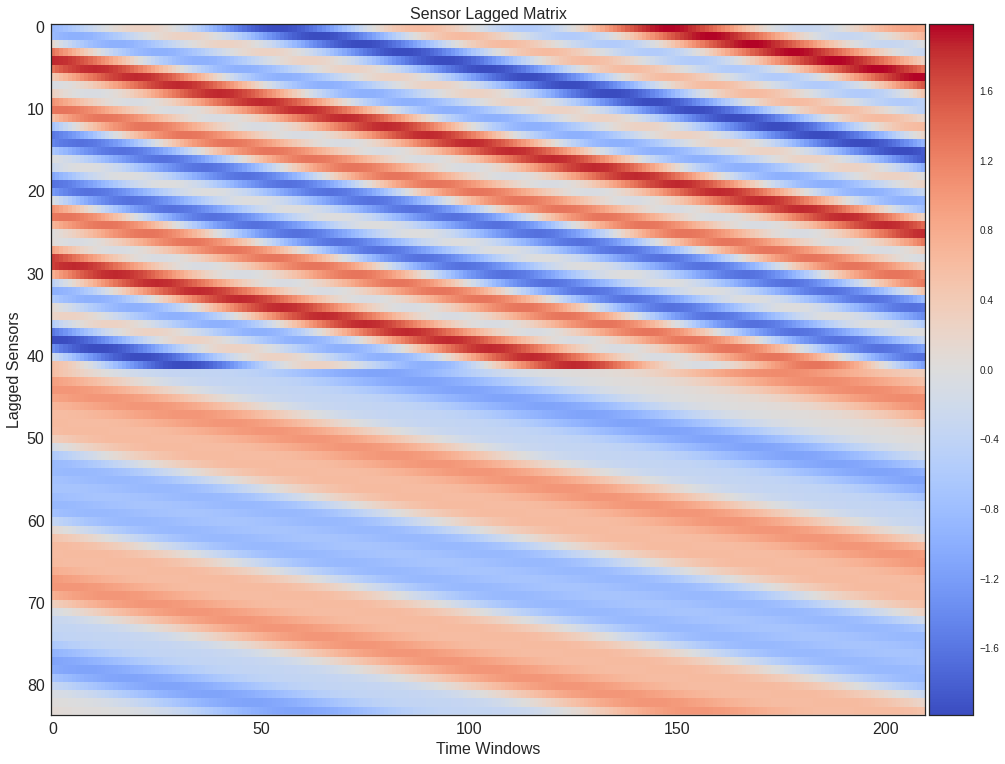

In [157]:
%matplotlib inline
fig = visualize_SLM(nexa_object)
plt.show(fig)

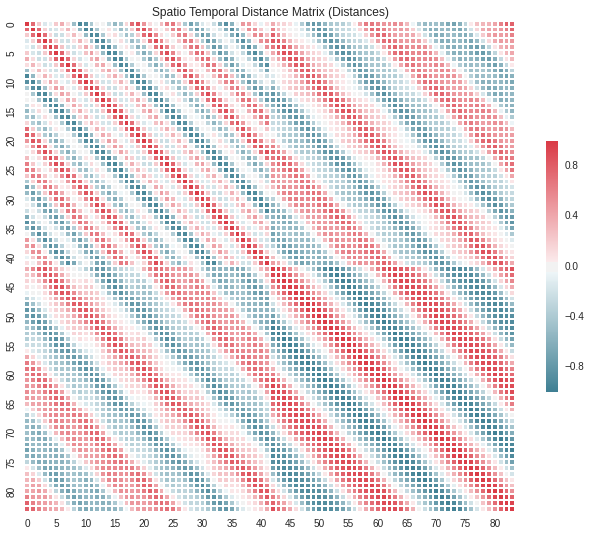

In [158]:
# %matplotlib qt
#  fig = visualize_STDM(nexa_object)
fig = visualize_STDM_seaborn(nexa_object)
plt.show(fig)

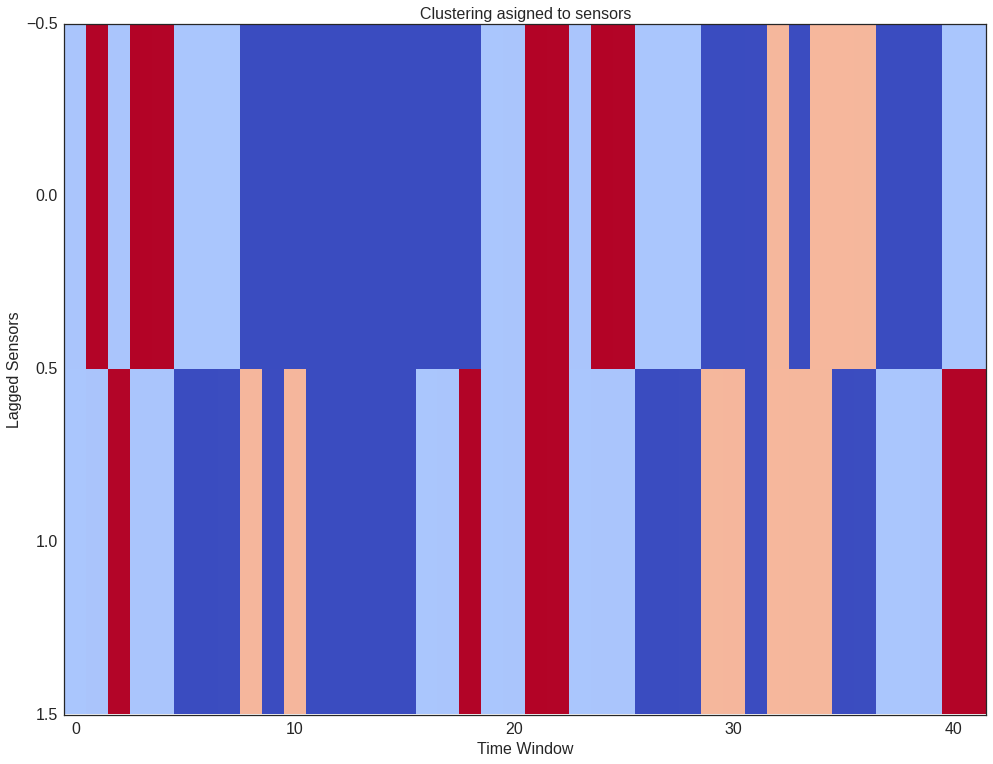

In [159]:
%matplotlib inline
fig = visualize_cluster_matrix(nexa_object)

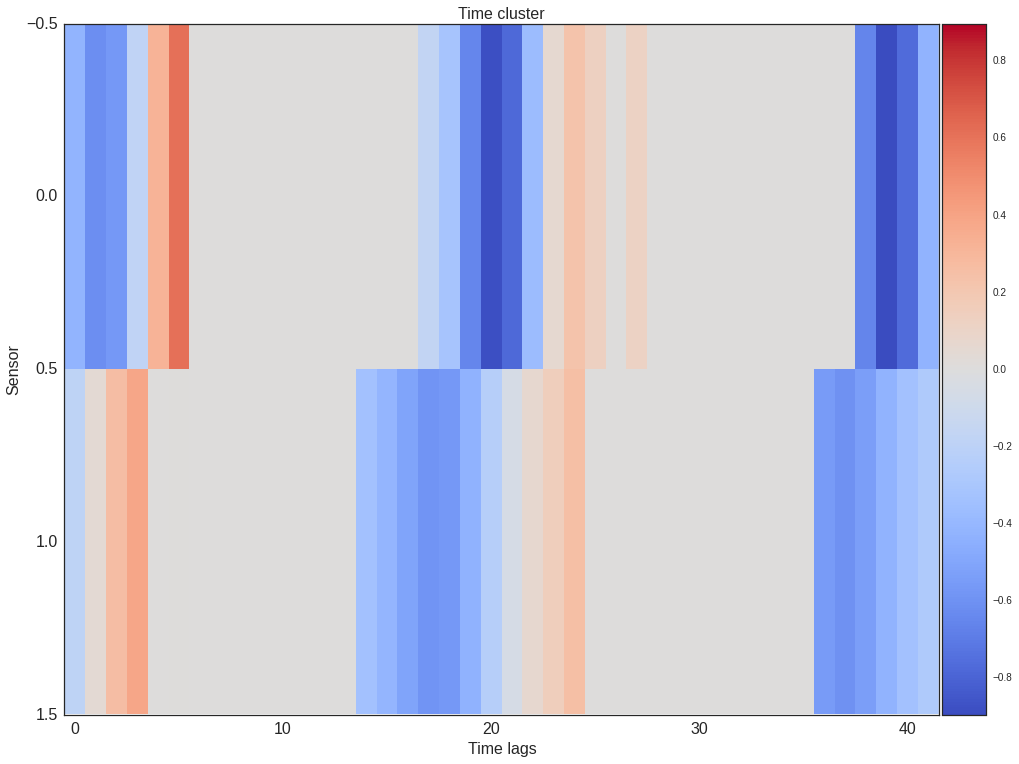

In [135]:
%matplotlib inline
cluster = 0
time_center = 0
fig = visualize_time_cluster_matrix(nexa_object, cluster, time_center,
                                    cmap='coolwarm', inter='none',
                                    origin='upper', fontsize=16)